Census Income Project

Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker
(Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following
conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian 
non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end 
we come back to all the controls we used.The term estimate refers to population totals derived from CPS by creating 
"weighted tallies" of any specified socio-economic characteristics of the population. 
People with similar demographic characteristics should have similar weights.
There is one important caveat to remember about this statement.
That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection,
the statement only applies within state.


In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns

In [6]:
df.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values

Determining the target value and identifying the problem 

In [8]:
df['Income'].unique()


array([' <=50K', ' >50K'], dtype=object)

This has only two values so This is a Classification problem 

<AxesSubplot:xlabel='Income', ylabel='count'>

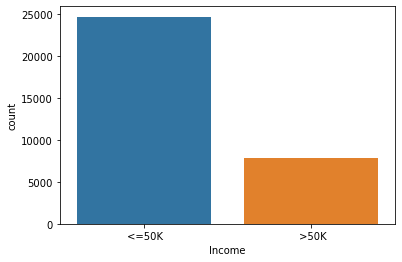

In [9]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.countplot(df['Income'])

This is a class imbalance problem this will be sorted in the solution after removing/converting the columns to graphable dtypes

Let us encode before validating the details

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


    Age             : The age of people
    Workclass      : Type of job
    Fnlwgt         : Final weight
    Education      : Education status
    Education_num  : Number of years of education in total
    Marital_status : Marital_status
    Occupation     : Occupation
    Relationship   : Relationship
    Race           : residential segregation
    Sex            : Gender
    Capital_gain   : Capital gain is the profit one earns
    Capital_loss   : Capital gain is the profit one loose
    Hours_per_week : Earning rate as per hrs
    Native_country : Country
    Income         : Income (Target variable)

In [11]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [12]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

in these two columns we see ? 

In [21]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


 droping the null values from both the columns

In [18]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [19]:
df.shape

(30161, 15)

In [20]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Around 2400 records are dropped 

In [22]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [ ]:
Now the ? is removed 

# EDA

<AxesSubplot:>

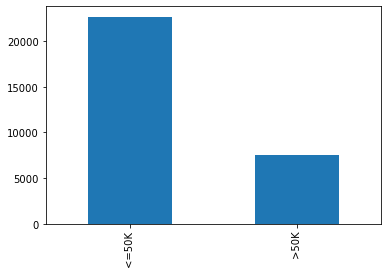

In [23]:
df['Income'].value_counts().plot(kind='bar')


We shall convert all the columns to one dtype using label encoder

# Label Encoder

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [29]:
df1.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

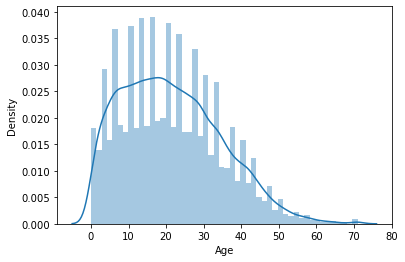

In [30]:
sns.distplot(df1['Age'])


<AxesSubplot:xlabel='Workclass', ylabel='Density'>

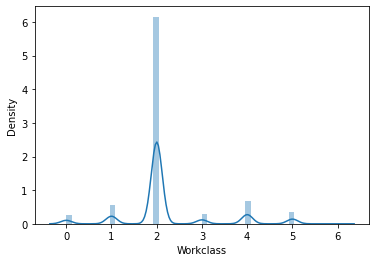

In [31]:
sns.distplot(df1['Workclass'])


<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

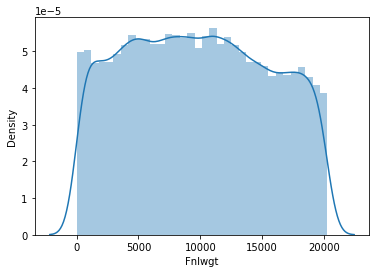

In [32]:
sns.distplot(df1['Fnlwgt'])


<AxesSubplot:xlabel='Education', ylabel='Density'>

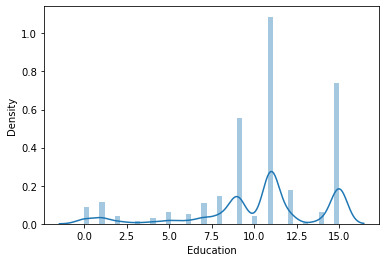

In [33]:
sns.distplot(df1['Education'])


<AxesSubplot:xlabel='Education_num', ylabel='Density'>

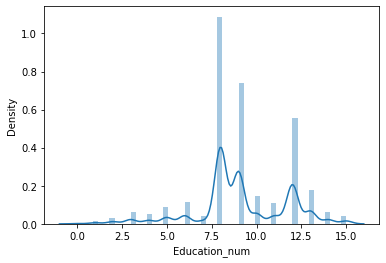

In [34]:
sns.distplot(df1['Education_num'])


<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

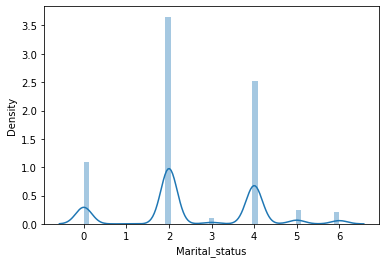

In [35]:
sns.distplot(df1['Marital_status'])


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

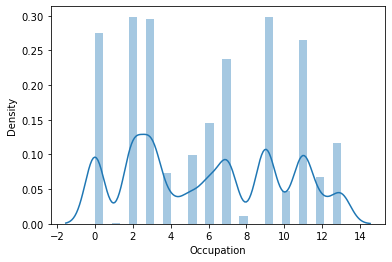

In [36]:
sns.distplot(df1['Occupation'])


<AxesSubplot:xlabel='Relationship', ylabel='Density'>

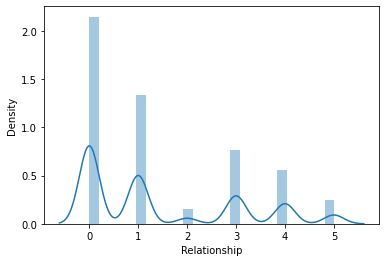

In [37]:
sns.distplot(df1['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

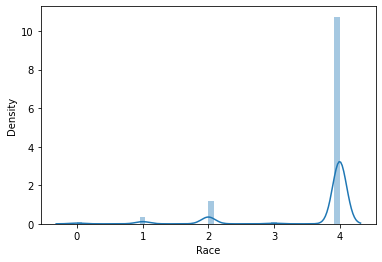

In [38]:
sns.distplot(df1['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

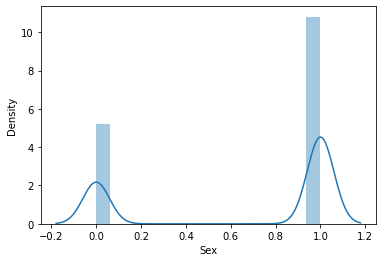

In [39]:
sns.distplot(df1['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

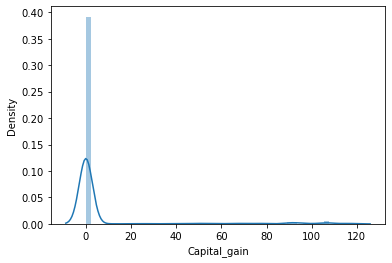

In [40]:
sns.distplot(df1['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

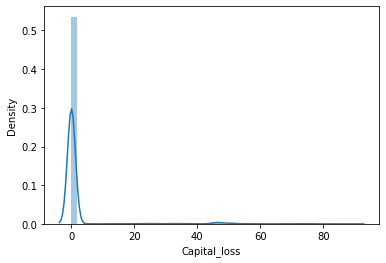

In [41]:
sns.distplot(df1['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

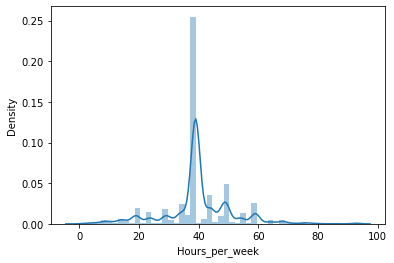

In [42]:
sns.distplot(df1['Hours_per_week'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

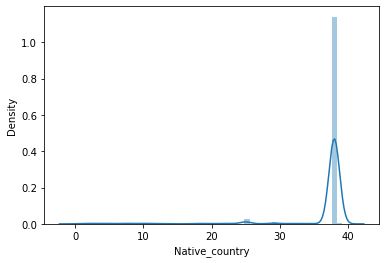

In [43]:
sns.distplot(df1['Native_country'])

All the columns are not normally ditributed and there are skewness in most of the column

# TO identify the Outliers 

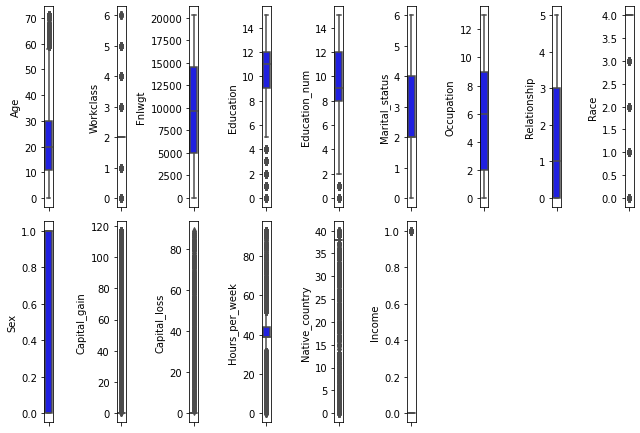

In [45]:
import matplotlib.pyplot as plt
collist=df1.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df1[collist[i]], color='blue', orient='x')
    plt.tight_layout()

Age,Workclass,Education,Education_num,Race,Capital_gain,Capital_loss,

Hours_per_week,Native_country,Income columns have outliers and that needs to be treated 

# Solving Class Imbalance problem

In [47]:
class_count_0, class_count_1 = df1['Income'].value_counts()

# Separate class
class_0 = df1[df1['Income'] == 0]
class_1 = df1[df1['Income'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (22653, 15)
class 1: (7508, 15)


total Income of 1 and0: 1    7508
0    7508
Name: Income, dtype: int64


<AxesSubplot:title={'center':'Income'}>

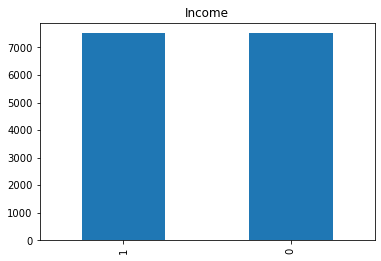

In [49]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total Income of 1 and0:",test_under['Income'].value_counts())# plot the count after under-sampeling
test_under['Income'].value_counts().plot(kind='bar', title='Income')

Class imbalance is solved 

In [51]:
cor=df1.corr()
cor


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080633,-0.078139,-0.001099,0.043543,-0.276618,-0.005656,-0.246619,0.023428,0.082036,0.127099,0.066325,0.102539,-0.001892,0.242196
Workclass,0.080633,1.000000,-0.035731,0.017892,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.022714,0.011633,0.049054,0.007644,0.018103
Fnlwgt,-0.078139,-0.035731,1.000000,-0.025358,-0.043898,0.034130,0.001949,0.006867,-0.012018,0.024612,-0.005071,-0.009571,-0.024575,-0.070081,-0.009987
Education,-0.001099,0.017892,-0.025358,1.000000,0.345431,-0.040654,-0.038231,-0.012720,0.011158,-0.027880,0.032229,0.014866,0.060629,0.078794,0.078981
Education_num,0.043543,0.037729,-0.043898,0.345431,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.154438,0.083868,0.154690,0.091547,0.335317
Marital_status,-0.276618,-0.034338,0.034130,-0.040654,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.072170,-0.035856,-0.191256,-0.025911,-0.193504
Occupation,-0.005656,0.015719,0.001949,-0.038231,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.018123,0.013878,0.017495,-0.003470,0.051551
Relationship,-0.246619,-0.067401,0.006867,-0.012720,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.092799,-0.066306,-0.260494,-0.010806,-0.251009
Race,0.023428,0.044700,-0.012018,0.011158,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.025719,0.023372,0.049021,0.124511,0.071666
Sex,0.082036,0.074917,0.024612,-0.027880,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.078442,0.050951,0.233435,0.000612,0.216715


<AxesSubplot:>

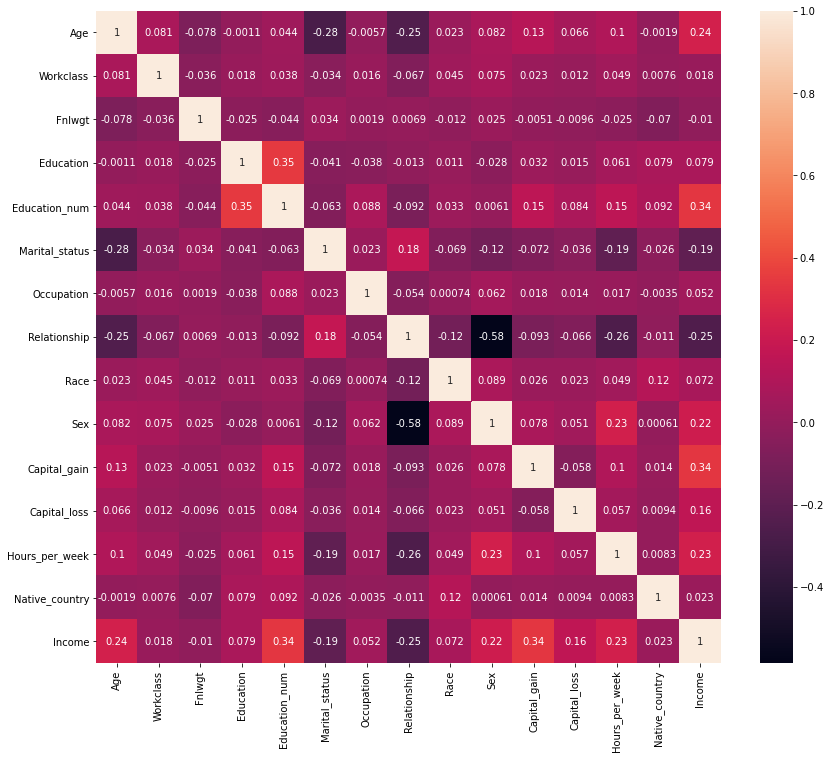

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(14,12))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='b')

Education_num, finwgt columns have no impact so we can drop them 

In [57]:
df1.drop(['Education_num','Fnlwgt'],axis=1,inplace=True)


# Removing Outliers¶


In [58]:
from scipy.stats import zscore

z=np.abs(zscore(df1))

df2=df1[(z<3).all(axis=1)]

In [59]:
df2.shape

(25246, 13)

In [60]:
df1.shape

(30161, 13)

30161-25244/30161

16.73% 
so we can consider only the old one with the outliers

# Removing skewness¶


In [63]:
df1.skew()


Age               0.523714
Workclass         1.154786
Education        -0.944971
Marital_status   -0.009387
Occupation        0.110420
Relationship      0.820275
Race             -2.506976
Sex              -0.750584
Capital_gain      3.533317
Capital_loss      5.151692
Hours_per_week    0.165144
Native_country   -4.178826
Income            1.161357
dtype: float64

# Defining Dependant and independent variable¶


In [65]:
x=df1.drop('Income',axis=1)
y=df1['Income']

In [66]:
x

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,33,4,9,2,3,0,4,1,0,0,12,38
1,21,2,11,0,5,1,4,1,0,0,39,38
2,36,2,1,2,5,0,2,1,0,0,39,38
3,11,2,9,2,9,5,2,0,0,0,39,4
4,20,2,12,2,3,5,4,0,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,2,7,2,12,5,4,0,0,0,37,38
32556,23,2,11,2,6,0,4,1,0,0,39,38
32557,41,2,11,6,0,4,4,0,0,0,39,38
32558,5,2,11,4,0,3,4,1,0,0,19,38


# Models -Finalisation 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1583)


In [72]:

#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.28169014 0.33333333 0.26666667 ... 0.         0.41935484 0.625     ]
 [0.28169014 0.         0.73333333 ... 0.         0.41935484 0.95      ]
 [0.12676056 0.33333333 0.73333333 ... 0.         0.41935484 0.95      ]
 ...
 [0.30985915 0.33333333 0.6        ... 0.         0.58064516 0.95      ]
 [0.22535211 0.33333333 1.         ... 0.         0.31182796 0.95      ]
 [0.4084507  0.33333333 0.6        ... 0.         0.3655914  0.95      ]]


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [74]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred=DTC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6824
           1       0.61      0.62      0.61      2225

    accuracy                           0.81      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.81      0.81      0.81      9049



In [75]:
RFC=RandomForestClassifier()

`+
`RFC.fit(new_xtrain,y_train)
pred=RFC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6824
           1       0.72      0.62      0.67      2225

    accuracy                           0.85      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.85      0.84      9049



In [76]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(new_xtrain, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [77]:
y_pred= classifier.predict(new_xtest)


In [78]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred=SV.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.80      0.98      0.89      6824
           1       0.84      0.27      0.41      2225

    accuracy                           0.81      9049
   macro avg       0.82      0.63      0.65      9049
weighted avg       0.81      0.81      0.77      9049



In [79]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
GBCpred = GBC.predict(new_xtest)
gbc=classification_report(y_test,GBCpred)
print(gbc)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6824
           1       0.79      0.61      0.69      2225

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049



# Cross Validation Score Calculation¶


In [80]:

from sklearn.model_selection import cross_val_score

In [89]:
print(cross_val_score(DTC,x,y,cv=5).mean())


0.8093564363727175


In [90]:
print(cross_val_score(RFC,x,y,cv=5).mean())


0.8480155838291695


In [91]:
print(cross_val_score(SV,x,y,cv=5).mean())


0.8074996559594204


In [92]:
print(cross_val_score(GBC,x,y,cv=5).mean())


0.8619741729945952


Difference between Model Accuracy and Cross Validation score

DTC= 85-80.9 = 4.1

RFC= 81-84.80 = 0.2

SV= 81-80.74 = 0.26

GBC= 86-80.84 = 1.16

Random Forest Classifier has least difference also has highest accuracy hence we can consider the same

# Hyper Parameter Tuning¶


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [94]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [95]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000F367700>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000F367730>})

In [96]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.8607474100229464


RandomizedSearchCV gives the best score which behaves the same in most of the cases as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters.

This approach reduces unnecessary computation

# Predictions

In [97]:
preds = RFC.predict(new_xtest)
print(preds[:30])
print(y_test[:30].values)

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0]


Predicted and true values are same

First row is predicted value

second row is actual value

# Final Model Creation¶


In [99]:
Final_mod = RandomForestClassifier(criterion= 'gini', max_depth = None, max_features= 3, min_samples_leaf = 6)
Final_mod.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred)
print(acc*100)

85.96530003315283


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [101]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC.fit(new_xtrain,y_train)
probs = RFC.predict(new_xtest)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
auc = auc(fpr, tpr)
print('AUC: %.3f' %auc)


AUC: 0.771


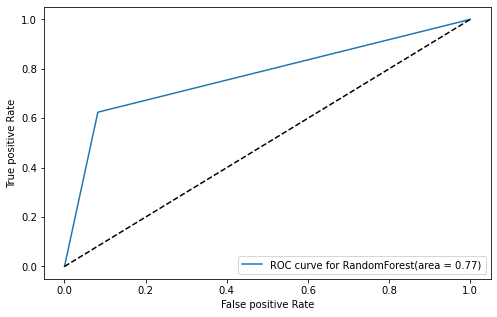

In [102]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve for RandomForest(area = %0.2f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='lower right')

# Confusion Matrix¶


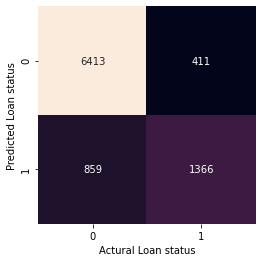

In [103]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural Loan status')
plt.ylabel('Predicted Loan status');


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6824
           1       0.77      0.61      0.68      2225

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.85      0.86      0.85      9049



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative

In [105]:
import joblib
joblib.dump(Final_mod,"census_Project.pkl")

['census_Project.pkl']